Alex Albaugh.  Wayne State.  CHE 5995/7507.  Lecture 5.  Winter 2026.

In class we derived the least-squares solution to linear regression, $\boldsymbol{\beta}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$.  You'll implement that way of doing linear regression in the homework set.  Here, we'll see how we can use <code>sklearn</code>, a <code>Python</code> library for machine learning to do least squares regression.  This will be our first introduction to <code>sklearn</code>, which we will use throughout the course.

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

First we'll load in the data.  We'll use the in-class example.  In this example, we want to predict the liquid level in a chemical storage tank (in meters) based off of the output of a load sensor (in mV) at the bottom of the tank.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albaugh/CHE7507/refs/heads/main/Lecture3/storage_tank_data.csv')
print(df.columns)

Index(['output (mV)', 'level (m)', 'temperature (F)', 'pressure (atm)'], dtype='object')


Here the output ($y$) is the <code>'level (m)'</code> column and the input ($x$) is the reading from the load sensor, the <code>'output (mV)'</code> column.

In [ ]:
y = df['level (m)'].values

X = df[['output (mV)']].values
#the double brackets are because sklearn learn will expect the features to be in a strictly 2D array, even if the data is 1D (ie. the same needs to be (N,1), not (N,))

Let's take a look at our data.

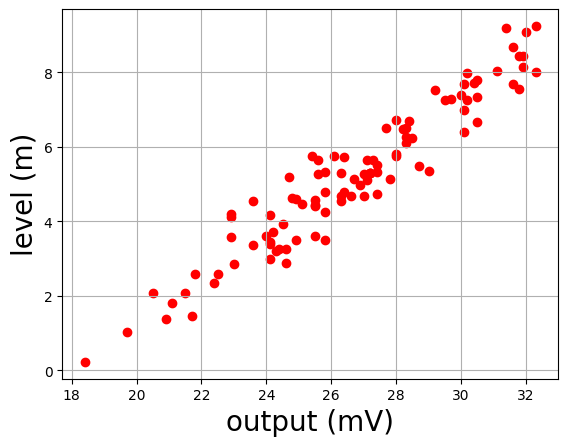

In [ ]:
fig, ax  = plt.subplots()
ax.scatter(X,y,color='r')
ax.set_xlabel('output (mV)',fontsize=20)
ax.set_ylabel('level (m)',fontsize=20)
ax.grid()
plt.show()

Now we'll set up the linear regression model from <code>sklearn</code>.

In [ ]:
model = sklearn.linear_model.LinearRegression()

Now we fit the model.  This is the step where the $\boldsymbol{\beta}$ parameters are determined.

In [ ]:
model.fit(X,y)

LinearRegression()

Let's take a look at our fitted model's parameters.  <code>.coef_</code> gives us the slope and <code>.intercept_</code> gives us the intercept.

In [ ]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  -10.667583365062432
Slope:  [0.59575618]


We can make predictions for our model using <code>.predict()</code>.  Here let's make a prediction for what the level will be with a sensor output of 25 mV.

In [ ]:
print(model.predict([[25]]))

[4.22632113]


We can also make a bunch of predictions at once.

In [ ]:
x_test = np.linspace(np.min(X),np.max(X),10).reshape(-1,1)
print(model.predict(x_test))

[0.29433034 1.21444267 2.13455499 3.05466731 3.97477963 4.89489195
 5.81500428 6.7351166  7.65522892 8.57534124]


Let's plot our predictions against our original training data.

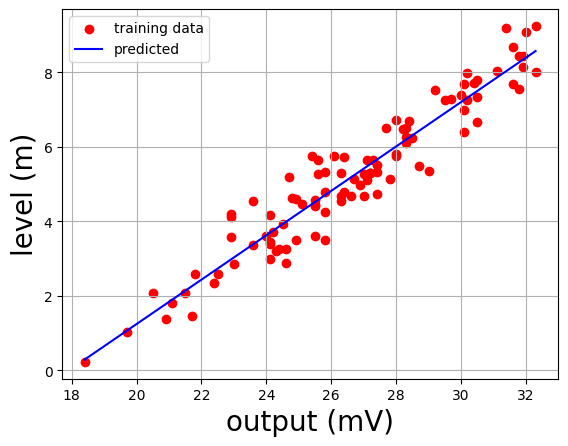

In [ ]:
fig, ax  = plt.subplots()
ax.scatter(X,y,color='r',label='training data')
ax.plot(x_test,model.predict(x_test),color='b',label='predicted')
ax.set_xlabel('output (mV)',fontsize=20)
ax.set_ylabel('level (m)',fontsize=20)
ax.legend()
ax.grid()
plt.show()

Another useful thing to do is look at how the predicted values compare to the actual values.  We'll look at the predictions for each of our training points and plot that against the actual data.  If our model was perfect, the result should be a perfectly straight line.  We don't see that, but it looks pretty good.

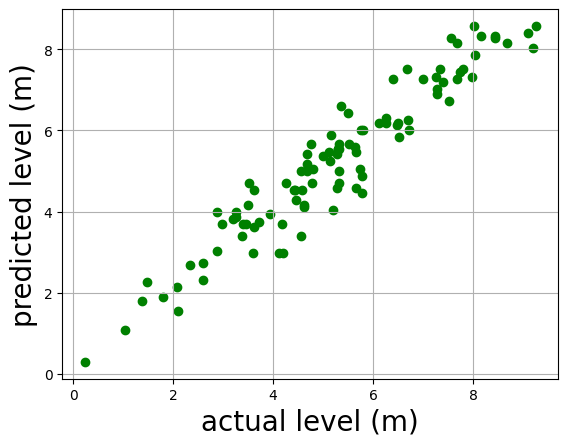

In [ ]:
fig, ax  = plt.subplots()
y_pred = model.predict(X)
ax.scatter(y,y_pred,color='g')
ax.set_xlabel('actual level (m)',fontsize=20)
ax.set_ylabel('predicted level (m)',fontsize=20)
ax.grid()
plt.show()

We can also examine metrics to assess the quality of our fit.  We'll look at the mean squared error (MSE) and the $R^2$ value of the actual level vs. the predicted level.  MSE will have units of $m^2$.  $R^2$ is a measure of correlation to the predicted and actual values.  $R^2=1$ is perfect correlation and $R^2=0$ is completely uncorrelated.  We can take the square root of MSE (RMSE) to get an error in the original units of meters.

In [ ]:
mse = sklearn.metrics.mean_squared_error(y, y_pred)
r2 = sklearn.metrics.r2_score(y, y_pred)
print('MSE: ', np.round(mse,decimals=3),'m^2')
print('RMSE: ', np.round(np.sqrt(mse),decimals=3),'m')
print('R^2: ', np.round(r2,decimals=3))

MSE:  0.331 m^2
RMSE:  0.575 m
R^2:  0.913


Let's run this analysis again where we use multiple linear regression.  We'll predict using both the sensor output and the atmospheric pressure.

In [ ]:
#Here we'll select the level as y, just as before
y = df['level (m)'].values

#Here we'll select both sensor output in mV and ambient pressure in atm for the predictors
X = df[['output (mV)','pressure (atm)']].values

#now we refit the model
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  -5.846125000314505
Coefficients:  [ 0.60177477 -4.97386509]


Above, we still have a single intercept.  But now we have two coefficients, one for each feature.  The first is for the sensor output, the second is for the atmospheric pressure.  Let's visualize this data and our prediction.

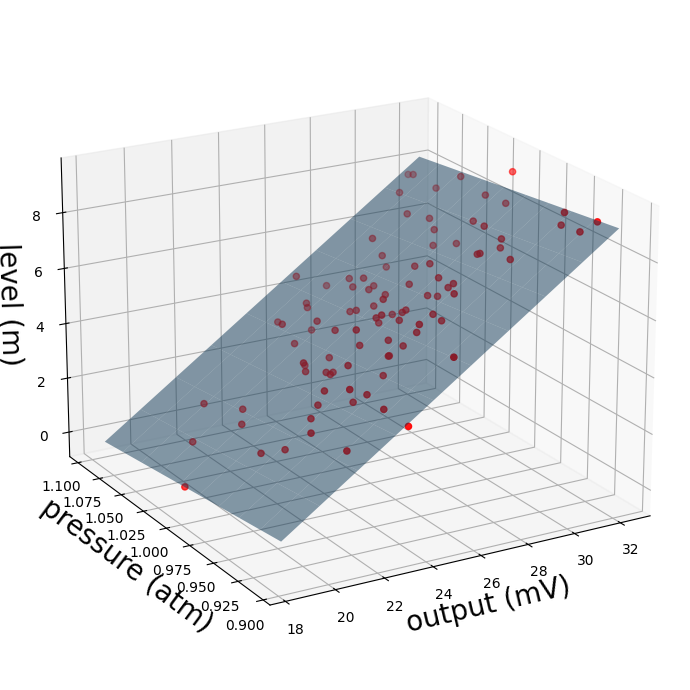

In [ ]:
#set up a 3D plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=240) #this controls the angle that we see the 3D plot from

#plot the training data
ax.scatter(X[:,0],X[:,1],y,color='r')

#set up a grid of predictions
x_range = np.linspace(np.min(X[:,0]), np.max(X[:,0]),10)
y_range = np.linspace(np.min(X[:,1]), np.max(X[:,1]),10)
xx, yy = np.meshgrid(x_range, y_range)
grid = np.column_stack([xx.flatten(), yy.flatten()])


#make predictions on the grid
z_pred = model.predict(grid)

#plot the predictions on the grid as a surface
zz = z_pred.reshape(xx.shape)
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.set_xlabel('output (mV)',fontsize=20)
ax.set_ylabel('pressure (atm)',fontsize=20)
ax.set_zlabel('level (m)',fontsize=20)
plt.tight_layout()
plt.show()

Let's plot our actual level values compared to what our model predicts on the training data, as we did with the 1D regression.

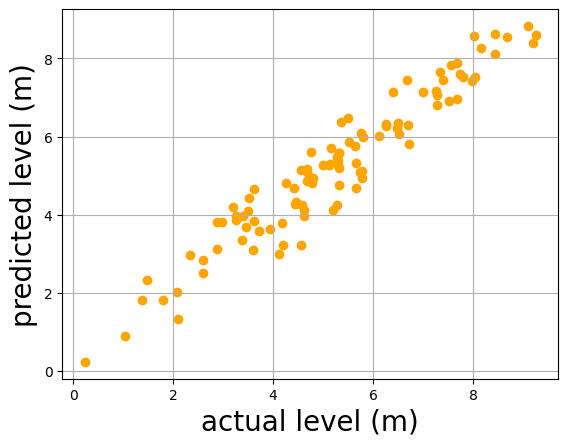

In [ ]:
fig, ax  = plt.subplots()
y_pred = model.predict(X)
ax.scatter(y, y_pred, color='orange')
ax.set_xlabel('actual level (m)',fontsize=20)
ax.set_ylabel('predicted level (m)',fontsize=20)
ax.grid()
plt.show()

Including the ambient pressure in our regression seems to be doing better than using the sensor alone.  As before, let's see the metrics of our new model.

In [ ]:
mse = sklearn.metrics.mean_squared_error(y, y_pred)
r2 = sklearn.metrics.r2_score(y, y_pred)
print('MSE: ', np.round(mse,decimals=4),'m^2')
print('RMSE: ', np.round(np.sqrt(mse),decimals=4),'m')
print('R^2: ', np.round(r2,decimals=6))

MSE:  0.295 m^2
RMSE:  0.5432 m
R^2:  0.922405


These metrics from sitting to both the sensor output and the ambient pressure look better than fitting to the sensor alone.  We can also calculate MSE directly using numpy functions instead of using the <code>mean_squared_error</code> function from <code>sklearn</code>.

In [ ]:
mse = np.mean((y-y_pred)**2)
print(np.round(mse,decimals=4),'m^2')

0.295 m^2
